<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module E: Section 3.2 and 3.3


Danika Young

# Continuity and Differentiation

Continuity and differentiability are fundamental concepts in calculus:

- **Continuity**: A function $f(x)$ is continuous at $ x=a $ if:
  $
  \lim_{x \to a} f(x) = f(a)
  $
  This means there are no jumps or holes in the graph at $ x=a $.

- **Differentiability**: A function $ f(x) $ is differentiable at $ x=a $ if its derivative exists at $ x=a $. A function is not differentiable at **sharp points** or **discontinuities**.

---

### **1.2 Example 1: Checking Continuity with a Piecewise Function**
Consider the function:

$
f(x) =
\begin{cases}
x^2, & x \geq 0 \\
- x^2, & x < 0
\end{cases}
$

This function is continuous at $ x=0 $, but it has a sharp turn.


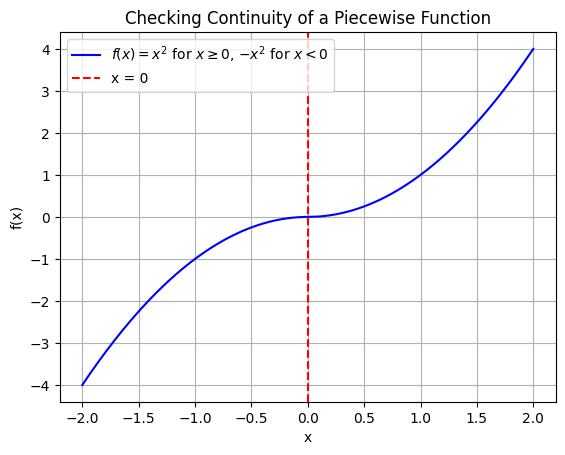

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function
def f(x):
    return np.where(x >= 0, x**2, -x**2)

# Generate values
x = np.linspace(-2, 2, 400)
y = f(x)

# Plot the function
plt.plot(x, y, label=r"$f(x) = x^2$ for $x \geq 0$, $-x^2$ for $x < 0$", color="blue")
plt.axvline(x=0, color='red', linestyle='--', label="x = 0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Checking Continuity of a Piecewise Function")
plt.grid()
plt.show()


# OBSERVATION: The function is continuous but not smooth at x=0.


In [3]:
from sympy import symbols, Abs, diff

# Define x as a real number
x = symbols('x', real=True)

# Define the absolute value function
f = Abs(x)

# Compute the derivative
df = diff(f, x)

# Print the result
print("Derivative of |x|:", df)


# OBSERVATION: The derivative is undefined at x=0, proving non-differentiability.


Derivative of |x|: sign(x)


# Taylor's Theorem

Taylor’s Theorem approximates a function $f(x)$ near a point $ a $ using a polynomial:

$
f(x) \approx f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \dots
$

More terms = better approximation.

## Example

The Taylor series of $ e^x $ at $ x=0 $ (Maclaurin series) is:

$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots
$


In [4]:
from sympy import exp, series

x = symbols('x')
taylor_exp = series(exp(x), x, 0, 5)  # 5 terms
print("Taylor Series of e^x:", taylor_exp)

# OBSERVATION: Taylor expansion provides a local approximation.


Taylor Series of e^x: 1 + x + x**2/2 + x**3/6 + x**4/24 + O(x**5)


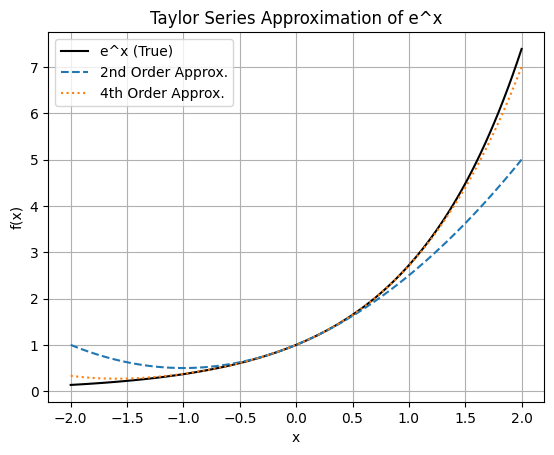

In [5]:
# True function
x_vals = np.linspace(-2, 2, 100)
y_true = np.exp(x_vals)

# Taylor approximations
y_taylor2 = 1 + x_vals + (x_vals**2)/2
y_taylor4 = 1 + x_vals + (x_vals**2)/2 + (x_vals**3)/6 + (x_vals**4)/24

plt.plot(x_vals, y_true, label="e^x (True)", color="black")
plt.plot(x_vals, y_taylor2, label="2nd Order Approx.", linestyle="--")
plt.plot(x_vals, y_taylor4, label="4th Order Approx.", linestyle=":")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Taylor Series Approximation of e^x")
plt.grid()
plt.show()

# OBSERVATION: Higher-order terms improve accuracy


# Optimization with Gradient Descent

Gradient Descent is an optimization algorithm that minimizes a function using its derivative.

The update rule:

$
x_{new} = x_{old} - \alpha \cdot \frac{d}{dx} f(x)
$

where $ \alpha $ is the learning rate.



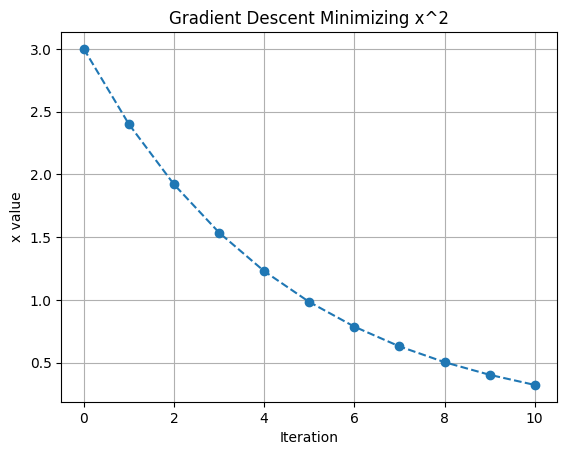

In [6]:
 def gradient_descent(learning_rate=0.1, iterations=10):
    x = 3.0  # Start point
    history = [x]

    for _ in range(iterations):
        grad = 2 * x  # Derivative of f(x) = x^2
        x = x - learning_rate * grad
        history.append(x)

    return history

steps = gradient_descent()

plt.plot(steps, marker="o", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.title("Gradient Descent Minimizing x^2")
plt.grid()
plt.show()

# OBSERVATION: The algorithm iteratively moves towards x=0, the minimum.

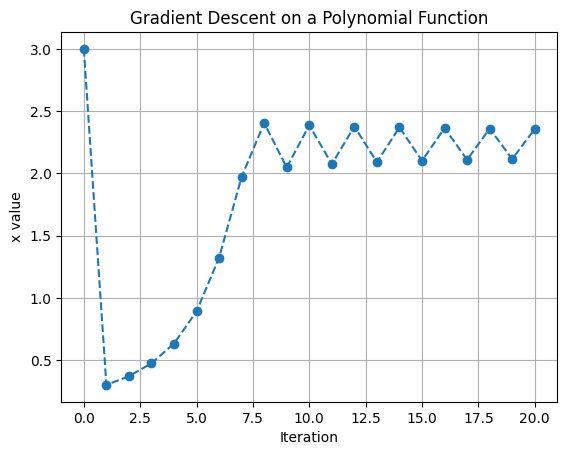

In [7]:
def gradient_descent_complex(learning_rate=0.1, iterations=20):
    x = 3.0
    history = [x]

    for _ in range(iterations):
        grad = 4*x**3 - 9*x**2  # Derivative of f(x)
        x = x - learning_rate * grad
        history.append(x)

    return history

steps = gradient_descent_complex()

plt.plot(steps, marker="o", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.title("Gradient Descent on a Polynomial Function")
plt.grid()
plt.show()

# OBSERVATION: The algorithm finds the local minimum.
